Здесь создан инфтерфейс для работы с графиками для одного признака.
То есть есть признак, ему на вход подаются data_heal, data_sick (желательно, чтобы не были перемешены), data_very_sick. Или patients_mean_heal, patients_mean_sick, patients_mean_very_sick (усредненные по пациентам). 

Внутри 

In [14]:
%reload_ext autoreload

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from final_make_samples_and_patients_data import data_heal, data_sick, data_very_sick, \
                                    patients_mean_heal, patients_mean_sick, patients_mean_very_sick 

from make_ready_data.create_features_indeces import get_labels_and_features_indeces

plot_labels, _ = get_labels_and_features_indeces()
print(plot_labels)

['QTc', 'JTc', 'TpeakTend', 'TQ', 'RR']


In [32]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
STEP=0.05; WIN_SIZE=18    

# vec - вектор с одним признаком 
# thresholds_space - просто множество всех точек, окрестность которых будем рассматривать
# STEP - промежуток между точками в thresholds_space
# WIN_SIZE - размер скользящего окна, которое применим к данным.
# Для каждого окна смотрим на все значения внутри, из них смотим сколько попало в текущих 
# промежуток в thresholds_space. Потом суммируем все окна в одно окно ( то есть в один вектор размера окна).
def merge_data_on_thresholds(vec, thresholds_space, STEP=STEP, WIN_SIZE=WIN_SIZE):
    n_slices = vec.size // WIN_SIZE # колво окон
    bins = np.zeros(thresholds_space.size)    
    eps = STEP/2+0.0001
    for i in range(n_slices):
        v = vec[i*WIN_SIZE:(i+1)*WIN_SIZE]
        for i_thresh, thresh in enumerate(thresholds_space):
            bins[i_thresh] += ((v<thresh+eps) * (v>thresh-eps)).sum() # n_samples_for_cur_thresh_cur_win    
    return np.round(bins / n_slices)

#     n_slices = vec.size // WIN_SIZE # колво окон
#     v = vec[:WIN_SIZE*n_slices]
#     bins = np.zeros(thresholds_space.size)    
#     eps = STEP/2 + 0.001
#     for i_thresh, thresh in enumerate(thresholds_space):
#         bins[i_thresh] += ((v<thresh+eps) * (v>thresh-eps)).sum() # n_samples_for_cur_thresh_cur_win    
#     return np.round(bins / n_slices)



def build_bar_for_one_group_one_feature(bin_heal, bin_sick, title, savefile_name, thresholds_space):
    width = 0.8*STEP/2
    plt.bar(thresholds_space+width/2, bin_heal, width=width, color='green', label='Heal')
    plt.bar(thresholds_space-width/2, bin_sick, width=width, color='red', label='Sick')
    plt.title(title)
    plt.xticks(thresholds_space)
    m1 = bin_heal.max() if bin_heal.size != 0 else 0 
    m2 = bin_sick.max() if bin_sick.size != 0 else 0 
    plt.yticks(np.arange(0, max(m1, m2)+2, 2))
    plt.xlabel('Feature\'s value', fontsize=15)
    plt.ylabel('Number of patients', fontsize=15)
    plt.savefig(savefile_name, bbox_inches='tight')
    plt.legend(fontsize=15)
    plt.show()
    
    
def short_axis_x(all_bins):
    edge1 = (all_bins!=0).argmax()
    edge2 = all_bins.size -(all_bins[::-1]!=0).argmax()
    return edge1, edge2

def build_bars_for_one_feature(data_heal, data_sick, data_very_sick, feat):

    vec_heal = data_heal[:, feat] # group 1
    vec_sick = data_sick[:, feat] # group 2
    vec_very_sick = data_very_sick[:, feat] # group 3
    
    vec = np.concatenate((vec_heal, vec_sick, vec_very_sick))
    start = np.round(vec.min(), 1)
    stop = np.round(vec.max(), 1)

    thresholds_space = np.arange(start, stop, STEP)
    bin_heal = merge_data_on_thresholds(vec_heal, thresholds_space, STEP, WIN_SIZE)
    bin_heal2 = merge_data_on_thresholds(vec_heal, thresholds_space, STEP, WIN_SIZE*2)
    bin_sick = merge_data_on_thresholds(vec_sick, thresholds_space, STEP, WIN_SIZE)
    bin_very_sick = merge_data_on_thresholds(vec_very_sick, thresholds_space, STEP, WIN_SIZE)

    e1, e2 = short_axis_x(bin_heal+bin_heal2+bin_sick+bin_very_sick)
    bin_heal = bin_heal[e1:e2]
    bin_heal2 = bin_heal2[e1:e2]
    bin_sick = bin_sick[e1:e2]
    bin_very_sick = bin_very_sick[e1:e2]    
    thresholds_space = thresholds_space[e1:e2]
    
    build_bar_for_one_group_one_feature(bin_heal, bin_sick, 
                                        title=plot_labels[feat]+ ", patients from group1 and group2", 
                                        savefile_name=plot_labels[feat]+ ", patients from group1 and group2", 
                                        thresholds_space=thresholds_space)

    build_bar_for_one_group_one_feature(bin_heal, bin_very_sick, 
                                        title=plot_labels[feat]+ ", patients from group1 and group3", 
                                        savefile_name=plot_labels[feat]+ ", patients from group1 and group3", 
                                        thresholds_space=thresholds_space)

    build_bar_for_one_group_one_feature(bin_heal2, bin_sick+bin_very_sick, 
                                        title=plot_labels[feat]+ ", patients from all three groups", 
                                        savefile_name=plot_labels[feat]+ ", patients from all three groups", 
                                        thresholds_space=thresholds_space)



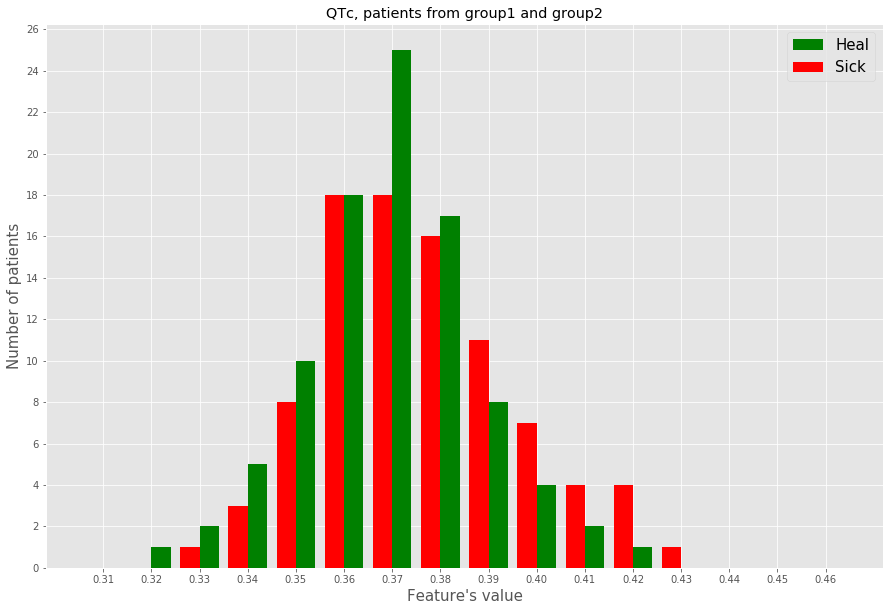

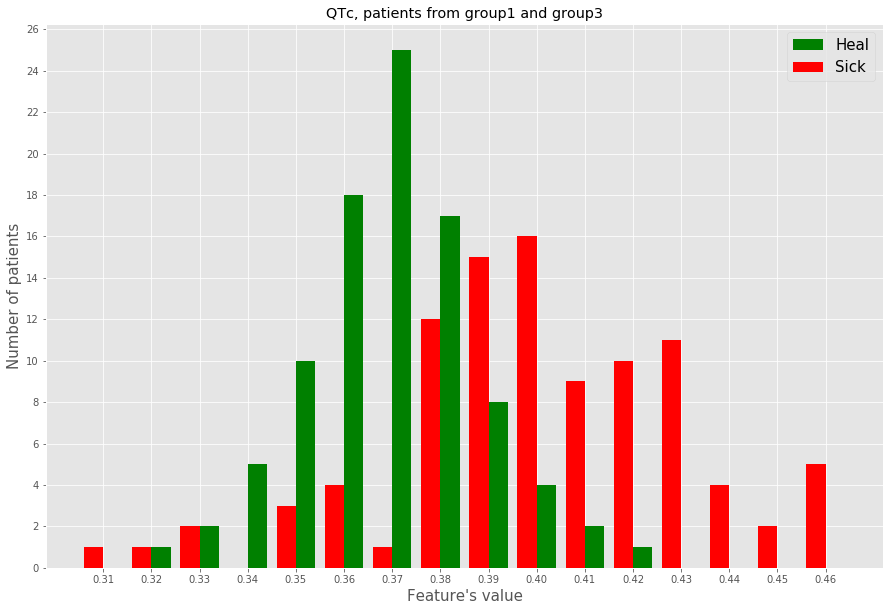

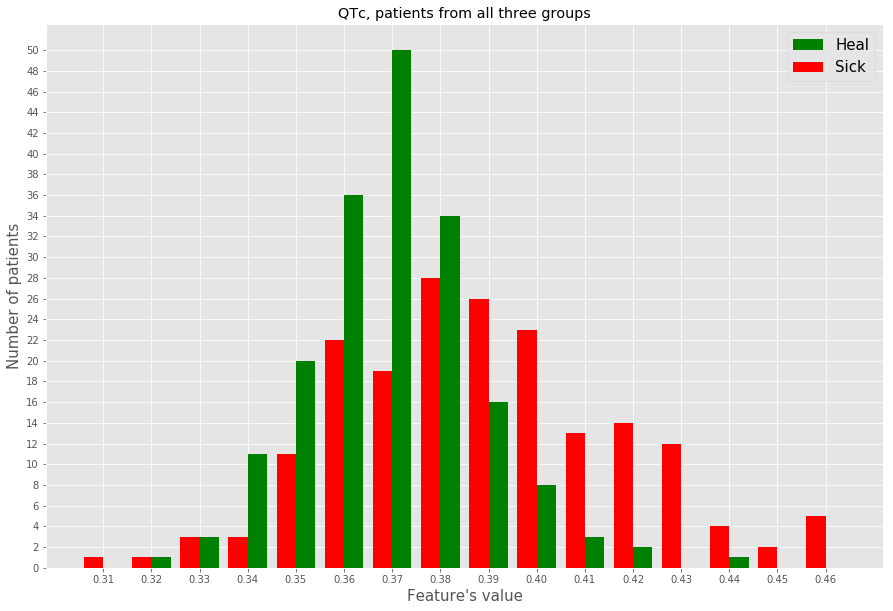

In [33]:
# STEP=0.05; WIN_SIZE=18    
# build_bars_for_one_feature(patients_mean_heal, patients_mean_sick, patients_mean_very_sick, 4)

STEP=0.01; WIN_SIZE=92    
build_bars_for_one_feature(data_heal, data_sick, data_very_sick, 0)

In [5]:
# print(patients_mean_heal.shape)
# print(patients_mean_sick.shape)